In [1]:
from utils import *

c:\Users\Thibaut\AppData\Local\Programs\Python\Python312\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


# Données

In [2]:
df = pd.read_csv('./donnees_rendu2/train.csv',sep='\t')

Nombre de lignes et colonnes : (21428, 20)

Valeurs manquantes :
 track_name                  0
track_popularity            0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

Type des données :
 track_name                   object
track_popularity              int64
track_album_name             object
track_album_release_date     object
playlist_name                object
playlist_id                  object
playlist_genre               object
playlist_subgenre            object
danceability

c:\Users\Thibaut\Desktop\Prog\LYON 2\Deep Learning\PROJET\utils.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=label, data=df, palette='viridis')


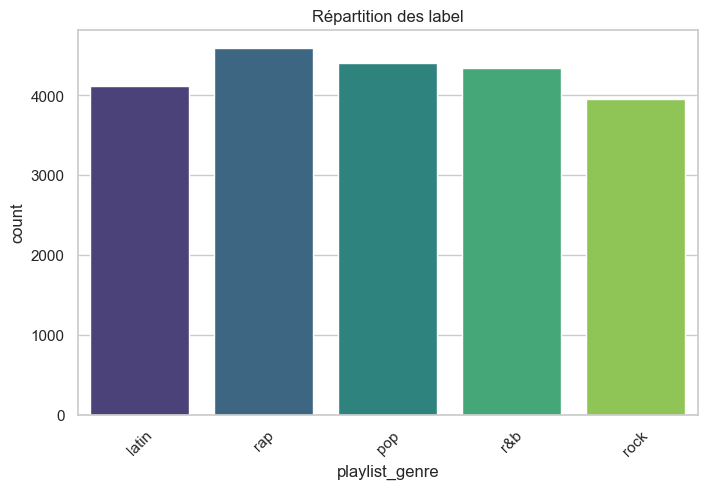


Colonnes quantitatives :
Index(['track_popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms'],
      dtype='object')


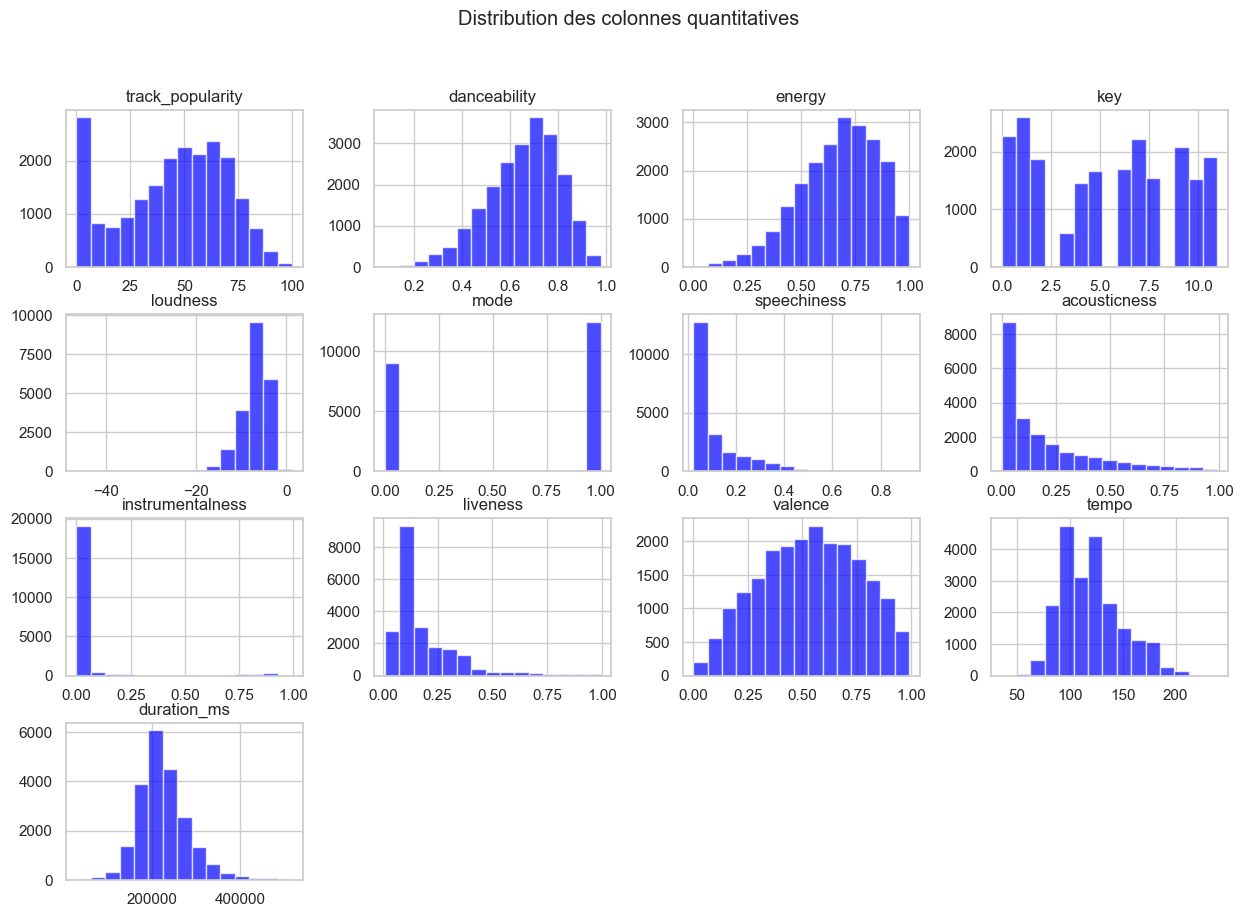

In [3]:
analyse_data(df,'playlist_genre')

In [4]:
# Donnée de train et de test pour les modèles (NUMERIQUE UNIQUEMENT)
X_train, X_test, y_train, y_test = pretraitement(df,'playlist_genre',only_num=True)

c:\Users\Thibaut\Desktop\Prog\LYON 2\Deep Learning\PROJET\utils.py:71: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = df[label].replace(classes,[0,1,2,3,4])


In [5]:
# Dataloader de train et de test pour le deep learning (NUMERIQUE UNIQUEMENT)
dataset_train = CustomDataset(X_train, y_train)
dataloader_train = get_dataloader(dataset_train, batch_size=64, shuffle=True)

dataset_test = CustomDataset(X_test, y_test)
dataloader_test = get_dataloader(dataset_test, batch_size=64, shuffle=True)

# Machine Learning

In [6]:
models = {
    'SVC' : make_pipeline(StandardScaler(), SVC(gamma='auto',random_state=SEED)),
    'RFC' : make_pipeline(StandardScaler(), RandomForestClassifier(random_state=SEED)),
    'LR' : make_pipeline(StandardScaler(), LogisticRegression(random_state=SEED)),
    'KNN' : make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))
}

In [7]:
machine_learning_models(models,X_train,X_test,y_train,y_test)

Model : SVC

              precision    recall  f1-score   support

         0.0       0.48      0.40      0.44      1237
         1.0       0.58      0.65      0.61      1378
         2.0       0.46      0.48      0.47      1322
         3.0       0.48      0.43      0.46      1304
         4.0       0.66      0.71      0.69      1188

    accuracy                           0.54      6429
   macro avg       0.53      0.54      0.53      6429
weighted avg       0.53      0.54      0.53      6429

Confusion matrix : 

[[500 221 271 160  85]
 [169 902 112 149  46]
 [185 127 630 190 190]
 [153 287 190 565 109]
 [ 43  23 168 107 847]]

Accuracy : 0.5356976201586561

F1_score_macro : 0.5325887259154118
Recall : 0.5363142828527814
Precision : 0.531936219193016
Model : RFC

              precision    recall  f1-score   support

         0.0       0.51      0.44      0.47      1237
         1.0       0.61      0.68      0.64      1378
         2.0       0.47      0.45      0.46      1322
     

# Deep Learning

## Model de base

In [8]:
input_size = X_train.shape[1]  # Nombre de caractéristiques
hidden_size = 32               # Nombre de neurones dans la couche cachée
output_size = len(np.unique(y_train))  # Nombre de classes

model_base = MLP_BASE(input_size=input_size,hidden_size=hidden_size,output_size=output_size)
print(model_base)

MLP_BASE(
  (fc1): Linear(in_features=13, out_features=32, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=32, out_features=5, bias=True)
  (softmax): Softmax(dim=1)
)


Époque 0/100: Loss = 1.7024
Époque 10/100: Loss = 1.7018
Époque 20/100: Loss = 1.7017
Époque 30/100: Loss = 1.7019
Époque 40/100: Loss = 1.7023
Époque 50/100: Loss = 1.7022
Époque 60/100: Loss = 1.7025
Époque 70/100: Loss = 1.7023
Époque 80/100: Loss = 1.7023
Époque 90/100: Loss = 1.7024
Époque 99/100: Loss = 1.7022


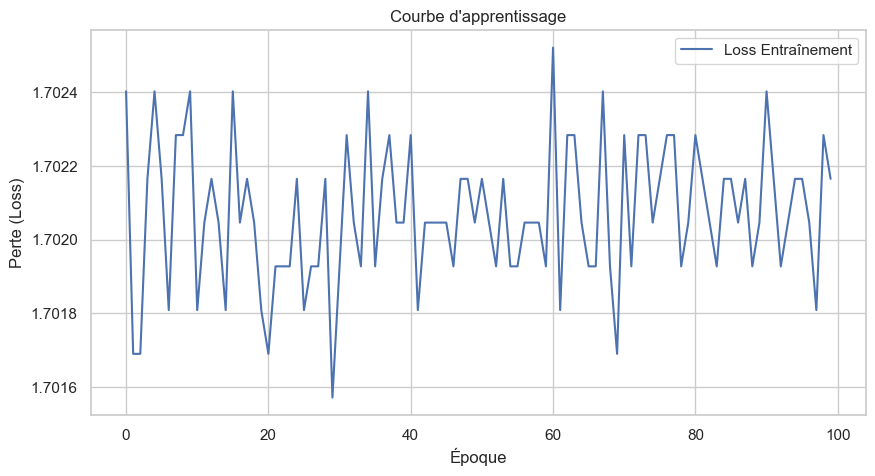

In [9]:
model_base = train_dl(epochs=100, model=model_base ,dataloader_train=dataloader_train, input_size=input_size)

In [10]:
test_model(model_base, dataloader_test)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1237
           1       0.00      0.00      0.00      1378
           2       0.00      0.00      0.00      1322
           3       0.20      1.00      0.34      1304
           4       0.00      0.00      0.00      1188

    accuracy                           0.20      6429
   macro avg       0.04      0.20      0.07      6429
weighted avg       0.04      0.20      0.07      6429

Confusion matrix : 

[[   0    0    0 1237    0]
 [   0    0    0 1378    0]
 [   0    0    0 1322    0]
 [   0    0    0 1304    0]
 [   0    0    0 1188    0]]

Accuracy : 0.20283092238295225

F1_score_macro : 0.06745118324065692
Recall : 0.2
Precision : 0.04056618447659045


c:\Users\Thibaut\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Thibaut\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Thibaut\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

## Model modifié

In [11]:
input_size = X_train.shape[1]  # Nombre de caractéristiques
num_classes = len(np.unique(y_train))  # Nombre de classes
model_modif = MLP_MODIF(input_size=input_size,num_classes=num_classes)
print(model_modif)

MLP_MODIF(
  (fc1): Linear(in_features=13, out_features=32, bias=True)
  (dropout1): Dropout(p=0.2, inplace=False)
  (act1): GELU(approximate='none')
  (fc2): Linear(in_features=32, out_features=10, bias=True)
  (norm): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act2): GELU(approximate='none')
  (fc3): Linear(in_features=10, out_features=32, bias=True)
  (dropout2): Dropout(p=0.2, inplace=False)
  (act3): GELU(approximate='none')
  (fc4): Linear(in_features=32, out_features=5, bias=True)
)


Époque 0/160: Loss = 1.5987
Époque 10/160: Loss = 1.5687
Époque 20/160: Loss = 1.5648
Époque 30/160: Loss = 1.5632
Époque 40/160: Loss = 1.5639
Époque 50/160: Loss = 1.5631
Époque 60/160: Loss = 1.5610
Époque 70/160: Loss = 1.5620
Époque 80/160: Loss = 1.5641
Époque 90/160: Loss = 1.5601
Époque 100/160: Loss = 1.5622
Époque 110/160: Loss = 1.5621
Époque 120/160: Loss = 1.5633
Époque 130/160: Loss = 1.5616
Époque 140/160: Loss = 1.5620
Époque 150/160: Loss = 1.5607
Époque 159/160: Loss = 1.5620


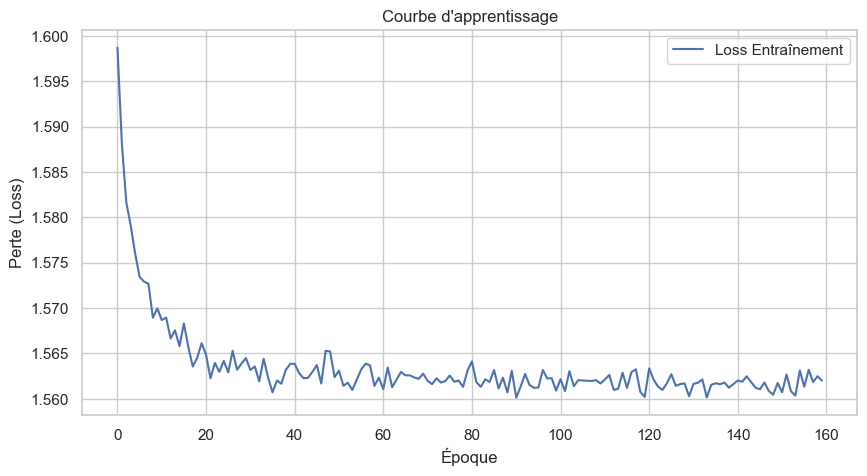

In [12]:
model_modif = train_dl(epochs=160, model=model_modif ,dataloader_train=dataloader_train, input_size=input_size)

In [13]:
test_model(model_modif, dataloader_test)

              precision    recall  f1-score   support

           0       0.15      0.01      0.01      1237
           1       0.25      0.56      0.34      1378
           2       0.18      0.35      0.23      1322
           3       0.27      0.10      0.15      1304
           4       0.50      0.03      0.06      1188

    accuracy                           0.22      6429
   macro avg       0.27      0.21      0.16      6429
weighted avg       0.26      0.22      0.16      6429

Confusion matrix : 

[[  8 699 465  54  11]
 [ 12 778 480  99   9]
 [ 16 770 466  64   6]
 [  4 516 641 132  11]
 [ 15 389 599 148  37]]

Accuracy : 0.2210297091305024

F1_score_macro : 0.15913550245550875
Recall : 0.21118432187990527
Precision : 0.26673164829816665


## Submission

In [14]:
df_test = pd.read_csv('./donnees_rendu2/test.csv',sep='\t')

In [15]:
X_pred = torch.FloatTensor(df_test.select_dtypes(include=np.number).values)

In [16]:
pred = model_modif(X_pred)

In [17]:
df_test['playlist genre'] = torch.argmax(pred, dim=1)
df_test.to_csv('GHIZLAN_JUILLARD_prediction_base.csv', index=False)

# Text

In [3]:
X_train, X_test, y_train, y_test = pretraitement(df,'playlist_genre',False)

c:\Users\Thibaut\Desktop\Prog\LYON 2\Deep Learning\PROJET\utils.py:81: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = df_copy[label].replace(classes,[0,1,2,3,4])


In [4]:
dataset_train = CustomDataset(X_train, y_train)
dataloader_train = get_dataloader(dataset_train, batch_size=64, shuffle=True)

dataset_test = CustomDataset(X_test, y_test)
dataloader_test = get_dataloader(dataset_test, batch_size=64, shuffle=True)

In [5]:
input_size = X_train.shape[1]  # Nombre de caractéristiques
num_classes = len(np.unique(y_train))  # Nombre de classes
model_modif_text = MLP_MODIF_TEXT(input_size=input_size,hidden_size=64,num_classes=num_classes)
print(model_modif_text)

MLP_MODIF_TEXT(
  (lstm): LSTM(397, 64, batch_first=True)
  (fc1): Linear(in_features=64, out_features=32, bias=True)
  (act1): GELU(approximate='none')
  (fc2): Linear(in_features=32, out_features=10, bias=True)
  (norm): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act2): GELU(approximate='none')
  (fc3): Linear(in_features=10, out_features=32, bias=True)
  (act3): GELU(approximate='none')
  (fc4): Linear(in_features=32, out_features=5, bias=True)
)


Époque 0/60: Loss = 1.6095
Époque 10/60: Loss = 1.6083
Époque 20/60: Loss = 1.6085
Époque 30/60: Loss = 1.6083
Époque 40/60: Loss = 1.6083
Époque 50/60: Loss = 1.6083
Époque 59/60: Loss = 1.6083


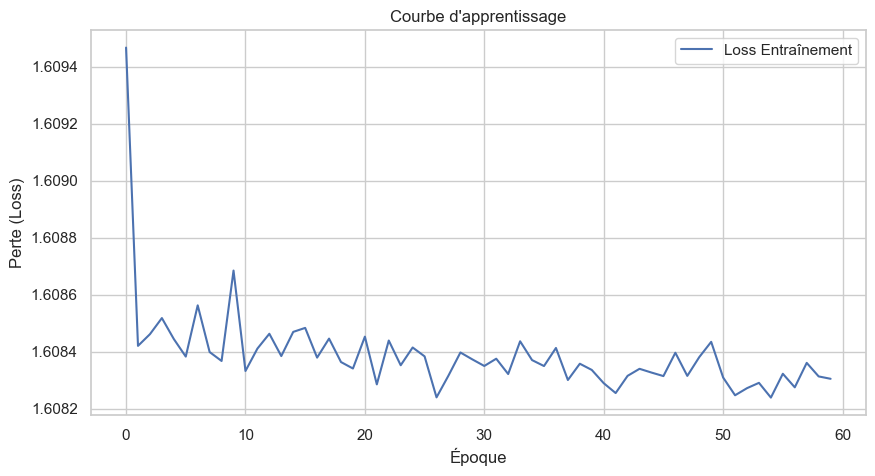

In [6]:
model_modif_text = train_dl(epochs=60, model=model_modif_text ,dataloader_train=dataloader_train, input_size=input_size,lstm=True)

In [8]:
test_model(model_modif_text, dataloader_test, lstm=True)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1237
           1       0.21      1.00      0.35      1378
           2       0.00      0.00      0.00      1322
           3       0.00      0.00      0.00      1304
           4       0.00      0.00      0.00      1188

    accuracy                           0.21      6429
   macro avg       0.04      0.20      0.07      6429
weighted avg       0.05      0.21      0.08      6429

Confusion matrix : 

[[   0 1237    0    0    0]
 [   0 1378    0    0    0]
 [   0 1322    0    0    0]
 [   0 1304    0    0    0]
 [   0 1188    0    0    0]]

Accuracy : 0.21434126613781304

F1_score_macro : 0.07060330472652747
Recall : 0.2
Precision : 0.04286825322756261


c:\Users\Thibaut\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Thibaut\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Thibaut\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

## Submission

In [23]:
df_test = pd.read_csv('./donnees_rendu2/test.csv',sep='\t')

In [24]:
emb = SentenceTransformer("all-MiniLM-L6-v2")

X_num = df_test.select_dtypes(include=np.number).values
# Sélection des données catégorielles
col = df_test.select_dtypes(include=pd.Categorical).columns
embeddings = emb.encode(df_test[col].values)
X_cat_transformer = embeddings
        
# Concatenate
X_pred = torch.FloatTensor(np.concatenate((X_num, X_cat_transformer), axis=1))

In [25]:
pred = model_modif_text(X_pred)

In [26]:
df_test['playlist genre'] = torch.argmax(pred, dim=1)
df_test.to_csv('GHIZLAN_JUILLARD_prediction_full.csv', index=False)